In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [5]:
train_df = pd.read_excel("Train.xlsx")
test_df = pd.read_excel("Test.xlsx")

In [6]:
train_df.head()

,Date,Sales
0,2012-08-25,1.779513
1,2012-08-26,1.914854
2,2012-08-27,1.607275
3,2012-08-28,1.554563
4,2012-08-29,1.581139


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    433 non-null    datetime64[ns]
 1   Sales   433 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.9 KB


In [8]:
train_df.set_index("Date", inplace=True)
test_df.set_index("Date", inplace=True)

In [9]:
train_df.head()

,Sales
Date,
2012-08-25,1.779513
2012-08-26,1.914854
2012-08-27,1.607275
2012-08-28,1.554563
2012-08-29,1.581139


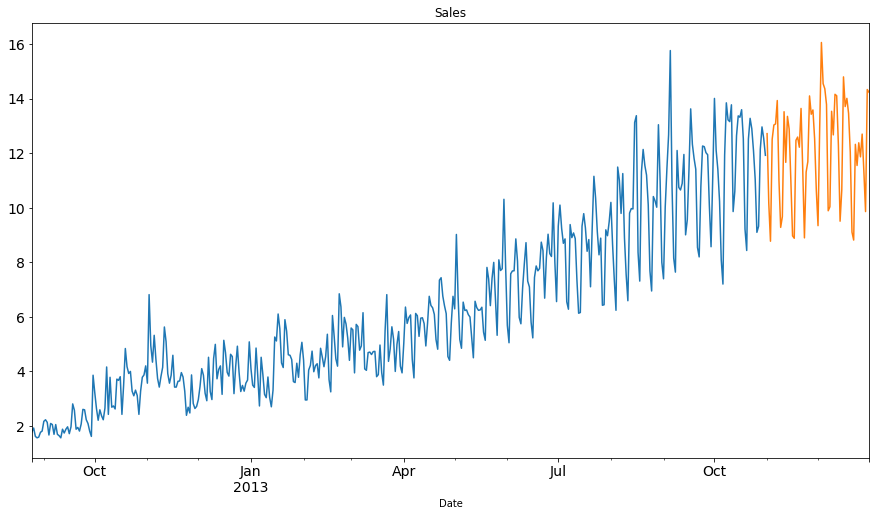

In [10]:
train_df.Sales.plot(figsize=(15,8), title= 'Sales', fontsize=14)
test_df.Sales.plot(figsize=(15,8), title= 'Sales', fontsize=14)
plt.show()

In [11]:
# !pip3 install auto-ts

In [14]:
from auto_ts import auto_timeseries

Importing plotly failed. Interactive plots will not work.


Imported auto_timeseries version:0.0.47. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [15]:
model = auto_timeseries(forecast_period=61,
                        score_type='rmse', time_interval='D',
                        model_type='best')

In [16]:
train_df.reset_index(inplace=True)

In [17]:
train_df.head()

,Date,Sales
0,2012-08-25,1.779513
1,2012-08-26,1.914854
2,2012-08-27,1.607275
3,2012-08-28,1.554563
4,2012-08-29,1.581139


Start of Fit.....
    Target variable given as = Sales
Start of loading of data.....
    Inputs: ts_column = Date, sep = ,, target = ['Sales']
    Using given input: pandas dataframe...
    Date column exists in given train data...
    train data shape = (433, 1)
Alert: Could not detect strf_time_format of Date. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model
No time series plot since verbose = 0. Continuing
Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1341.512, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1282.463, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1393.897, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1284.248, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1282.881, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1294.266, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1390.278, Time=0.05 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1284.250, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1296.478, Time=0.05 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 1.179 seconds
Refitting data with previously found best parameters
    Best aic metric = 1378.3
                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  433
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -683.149
Date:     

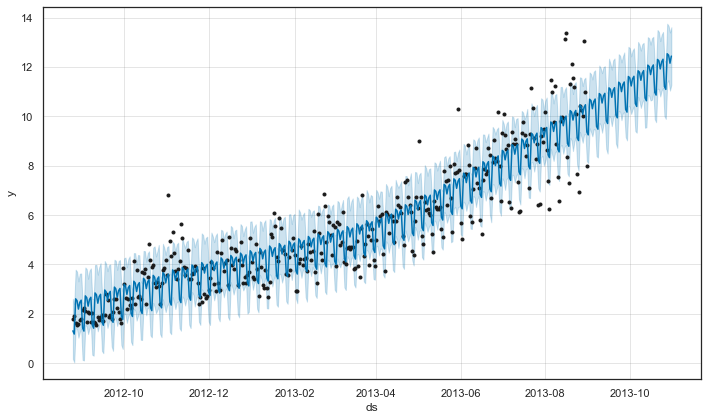

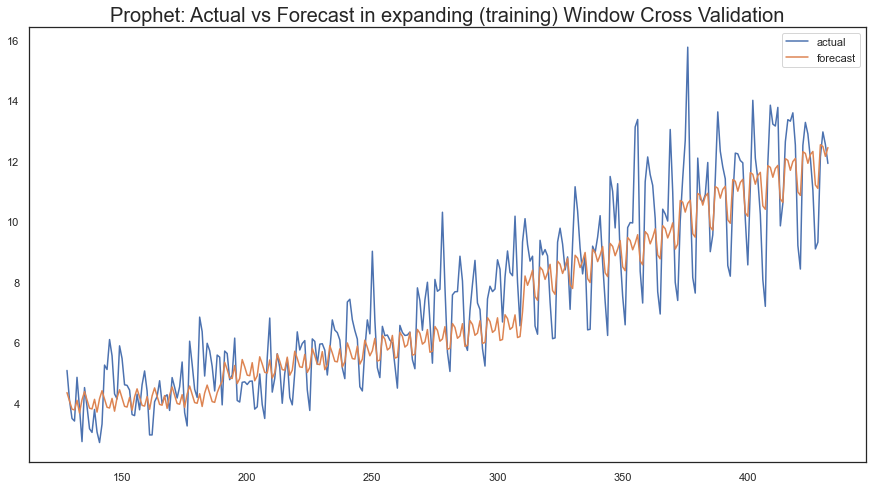

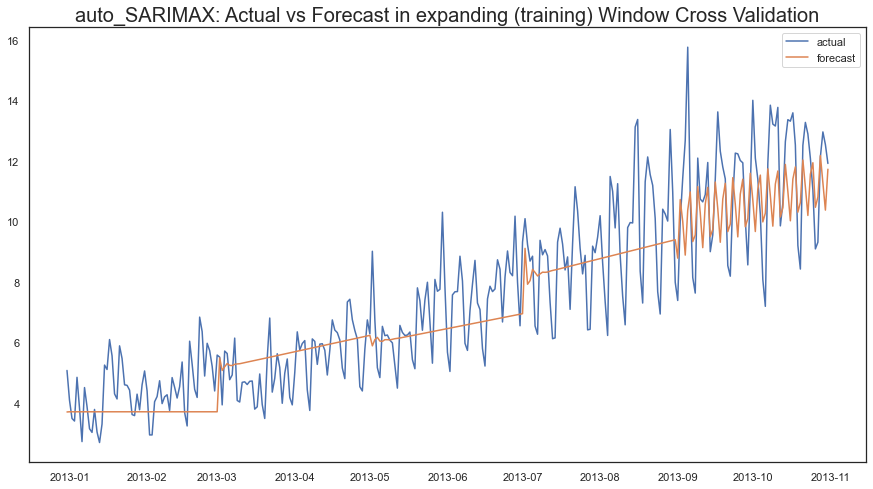

In [18]:
model.fit(traindata= train_df, 
          ts_column="Date",
          target="Sales")

In [19]:
future_predictions = model.predict(testdata=61)

Predicting using forecast period=61 as input for Prophet model
Building Forecast dataframe. Forecast Period = 61


In [20]:
test_df.reset_index(inplace=True)

In [21]:
test_df["Prophet Predictions"] = future_predictions["yhat"].values

In [22]:
test_df.head()

,Date,Sales,Prophet Predictions
0,2013-11-01,12.711543,12.597148
1,2013-11-02,10.152996,11.288140
2,2013-11-03,8.765463,11.118715
3,2013-11-04,12.506665,12.793591
4,2013-11-05,13.028814,12.920076


In [23]:
test_df.set_index("Date", inplace=True)

In [24]:
test_df.head(3)

,Sales,Prophet Predictions
Date,,
2013-11-01,12.711543,12.597148
2013-11-02,10.152996,11.288140
2013-11-03,8.765463,11.118715


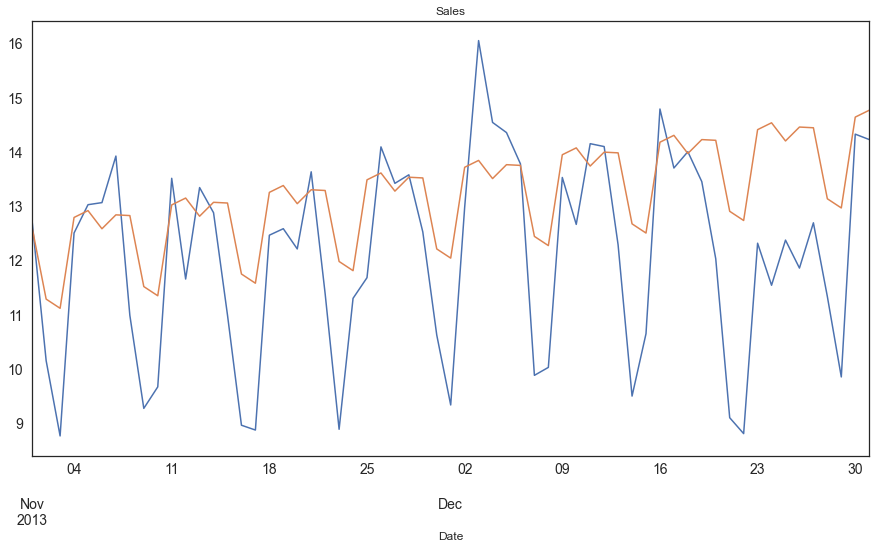

In [25]:
test_df["Sales"].plot(figsize=(15,8), title= 'Sales', fontsize=14)
test_df["Prophet Predictions"].plot(figsize=(15,8), title= 'Sales', fontsize=14)
plt.show()